# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [ ]:
!pip install --user --upgrade tables
!pip install --user pycaret

In [ ]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

In [ ]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
region=6
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
7805,3323006,Milaviga,Caramoran,Catanduanes,0.585658,1.834380,0.661985,1.0,0,1,1,3334079,30.615232,3.434358,2.201932,27.113346,12.340680,5.110454,5.061158,0.631207
8351,3338212,Progreso,San Miguel,Catanduanes,0.524737,1.845597,0.705757,1.0,0,1,1,3340987,18.174782,43.608114,31.330098,398.400354,188.827371,86.369472,92.296791,0.626585


In [ ]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

In [ ]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,3130892
1,3130893
2,3132273
3,3132274
4,3132275
...,...
8606,3353412
8607,3353413
8608,3353414
8609,3353421


In [ ]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(8611, 1)"
2,Transformed data shape,"(8611, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6265,33912.4262,0.5202,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

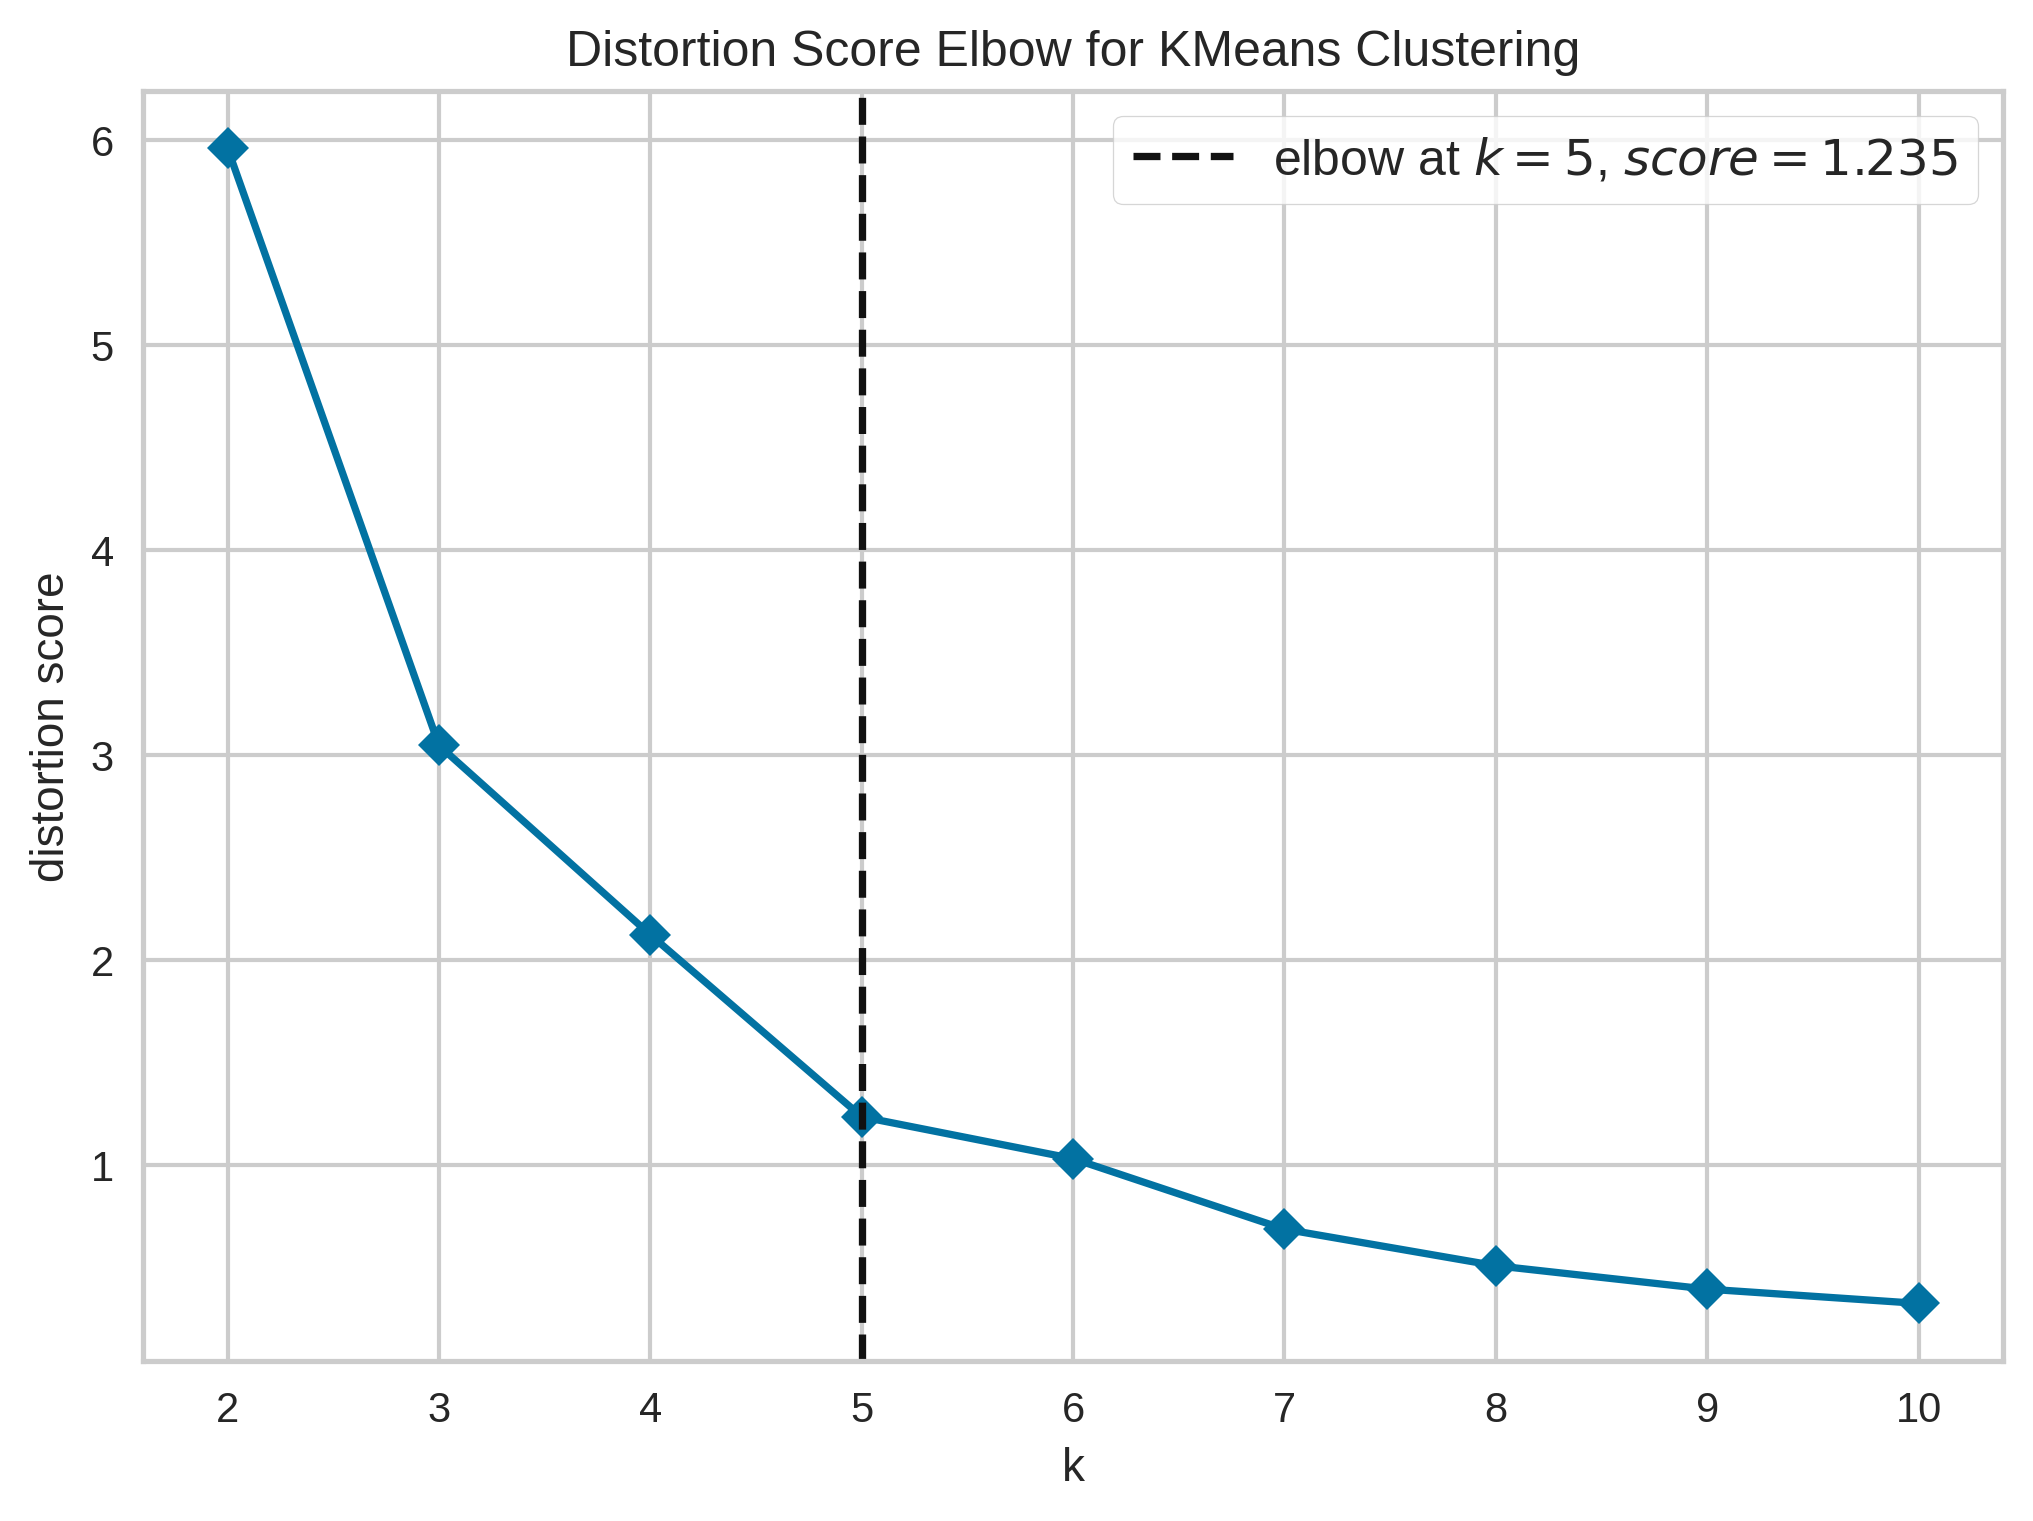

In [ ]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [ ]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [ ]:
model = create_model('kmeans', num_clusters = 5)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6315,45253.7887,0.4694,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.500000,Cluster 0
1,0.500000,Cluster 0
2,0.500000,Cluster 0
3,0.344417,Cluster 2
4,0.376660,Cluster 2
5,0.345709,Cluster 2
6,0.345885,Cluster 2
7,0.352624,Cluster 2
8,0.348505,Cluster 2
9,0.345718,Cluster 2


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results['Cluster'].unique()

array(['Cluster 0', 'Cluster 2', 'Cluster 4', 'Cluster 1', 'Cluster 3'],
      dtype=object)

In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(len(HCFAIdf_results['Accessibility Level'].unique())):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

max, min, total 0.5280696153640747 | 0.4789527356624603 | 3370
max, min, total 0.43457064032554626 | 0.3889259696006775 | 1464
max, min, total 0.3888927400112152 | 0.33619585633277893 | 1777
max, min, total 0.631207287311554 | 0.5281359553337097 | 282
max, min, total 0.47879716753959656 | 0.43462952971458435 | 1718


In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
7805,0.631207,Cluster 3
8351,0.626585,Cluster 3
8381,0.618536,Cluster 3
8563,0.616089,Cluster 3
6483,0.614255,Cluster 3
...,...,...
105,0.339327,Cluster 2
26,0.339327,Cluster 2
6527,0.338000,Cluster 2
6671,0.336235,Cluster 2


In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(0))
x = x.replace(['Cluster 3'],int(1))
x = x.replace(['Cluster 4'],int(0))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.500000,0,3130892
1,0.500000,0,3130893
2,0.500000,0,3132273
3,0.344417,0,3132274
4,0.376660,0,3132275
...,...,...,...
8606,0.400384,0,3353412
8607,0.467520,0,3353413
8608,0.500000,0,3353414
8609,0.500000,0,3353421


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI_y,Accessibility Level
0,3130892,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,61.731020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,3130893,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,61.959950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
2,3132273,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,60.628820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
3,3132274,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,60.737499,2.828934,1.503990,22.165947,10.671167,4.619398,3.688356,0.344417,0.344417,0
4,3132275,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,61.077166,37.639543,20.586360,295.183889,141.323334,61.721284,49.971853,0.376660,0.376660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,3353412,Sioron,Gigmoto,Catanduanes,0.916273,1.795925,0.643011,0.0,0,0,...,25.267266,34.670121,22.062824,254.247647,120.820175,46.927242,42.724820,0.400384,0.400384,0
8607,3353413,Sioron,Gigmoto,Catanduanes,0.916273,1.795925,0.643011,0.0,0,1,...,23.974702,16.775865,10.675560,123.023055,58.461375,22.706730,20.673300,0.467520,0.467520,0
8608,3353414,San Vicente,Gigmoto,Catanduanes,0.009095,1.801412,0.636142,0.0,0,0,...,23.201504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
8609,3353421,San Miguel,Baras,Catanduanes,1.008593,1.719764,0.628578,0.0,0,1,...,14.417925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,3130892,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,61.731020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
1,3130893,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,61.959950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
2,3132273,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,60.628820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
3,3132274,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,60.737499,2.828934,1.503990,22.165947,10.671167,4.619398,3.688356,0.344417,0.344417,0
4,3132275,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,61.077166,37.639543,20.586360,295.183889,141.323334,61.721284,49.971853,0.376660,0.376660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,3353412,Sioron,Gigmoto,Catanduanes,0.916273,1.795925,0.643011,0.0,0,0,...,25.267266,34.670121,22.062824,254.247647,120.820175,46.927242,42.724820,0.400384,0.400384,0
8607,3353413,Sioron,Gigmoto,Catanduanes,0.916273,1.795925,0.643011,0.0,0,1,...,23.974702,16.775865,10.675560,123.023055,58.461375,22.706730,20.673300,0.467520,0.467520,0
8608,3353414,San Vicente,Gigmoto,Catanduanes,0.009095,1.801412,0.636142,0.0,0,0,...,23.201504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
8609,3353421,San Miguel,Baras,Catanduanes,1.008593,1.719764,0.628578,0.0,0,1,...,14.417925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,3130892,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,3191699,61.731020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
1,3130893,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,3191699,61.959950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
2,3132273,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,3191699,60.628820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
3,3132274,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,3191699,60.737499,2.828934,1.503990,22.165947,10.671167,4.619398,3.688356,0.344417,0
4,3132275,Patag Ibaba,Santa Elena,Camarines Norte,1.853824,2.280699,0.894826,0.0,0,0,...,3191699,61.077166,37.639543,20.586360,295.183889,141.323334,61.721284,49.971853,0.376660,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,3353412,Sioron,Gigmoto,Catanduanes,0.916273,1.795925,0.643011,0.0,0,0,...,3340987,25.267266,34.670121,22.062824,254.247647,120.820175,46.927242,42.724820,0.400384,0
8607,3353413,Sioron,Gigmoto,Catanduanes,0.916273,1.795925,0.643011,0.0,0,1,...,3340987,23.974702,16.775865,10.675560,123.023055,58.461375,22.706730,20.673300,0.467520,0
8608,3353414,San Vicente,Gigmoto,Catanduanes,0.009095,1.801412,0.636142,0.0,0,0,...,3340987,23.201504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
8609,3353421,San Miguel,Baras,Catanduanes,1.008593,1.719764,0.628578,0.0,0,1,...,3340987,14.417925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0


# Export

In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')